# ASTR3110 Tutorial 6: Clustering

Tutorial 6 of the *'Data Science Techniques in Astrophysics'* course at Macquarie University.

## Learning outcomes from this tutorial

 * Understand the basic algorithm of K-means clustering.
 * Use the Scikit Learn clustering algorithm to find clusters in 2D data.
 * Test the behaviour of K-means clustering with different assumptions.
 * Apply Spectral Clustering to find embedded clusters (concentric rings).

## Setup

This week, we won't need to access any data on disk, so simply start a new *Python 3* notebook on Google Colab.

## Introduction to Clustering

Clustering is the grouping of data points which are similar to each other. It can be a powerful technique for identifying patterns in data. Clustering analysis does not usually require any training and is known as an unsupervised learning technique. The lack of a need for training means it can be applied quickly. Typical applications are:

 * Looking for trends in data
 * Data compression, all data clustering around a point can be reduced to just that point. For example reducing colour depth of an image.
 * Pattern recognition

 
### K-means Clustering

The K-means clustering algorithm is a simple clustering algorithm that tries to identify the centre of each cluster. It does this by iteratively searching for a point which minimises the distance between the centre and all the points in the cluster. The algorithm **needs to be told how many clusters to look for**, but a common technique is to try different numbers of clusters and combine it with other tests to decide on the best combination. The algorithm for k-means is well described on the [Wikipedia page for k-means](https://en.wikipedia.org/wiki/K-means_clustering) and consists of:

 1. Choose *n* random positions as cluster centres.
 2. Assign each point in the data to the nearest cluster centre.
 3. For each cluster, calculate the centroid and update the cluster centre positions.
 4. Repeat steps 2-4 until the cluster centres are stable (convergence).

Let's try this using scikit-learn:

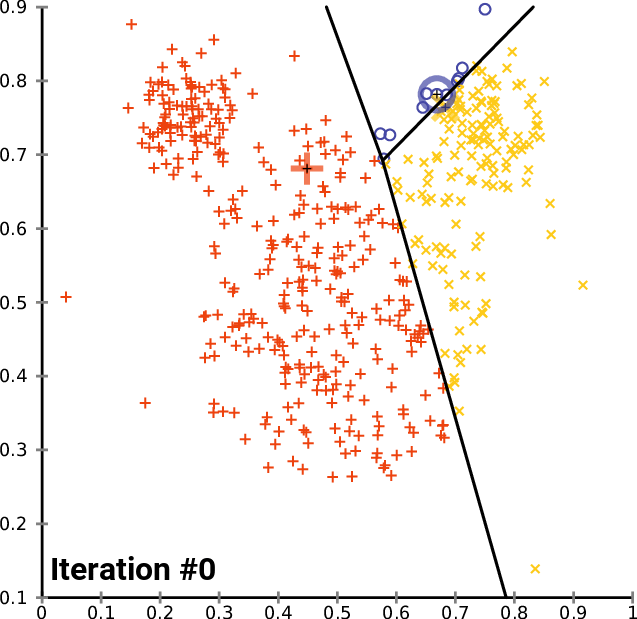

In [1]:
# Display gif illustrating Kmeans
from IPython.display import Image
Image(filename='Images/K-means_convergence.gif', width = 300, height = 150)

In [1]:
# Import necessary modules and set plots to appear inline.
import time
import matplotlib.pyplot as plt #as always, we'll be doing some plotting
import sklearn.cluster as skl_cl #we'll be using SciKit learn's clustering module, 
                                 #which hosts a number of different clustering methods.
import sklearn.datasets as datasets #SciKit learn contains a whole heap of commonly used datasets for 
                                    # for testing/demonstrating/simulating, which are contained in the datasets module
from sklearn.datasets import make_blobs as blobs# the Blobs module is one of the dataset modules that can be used to 
                                                #generate N-Dimensional Gaussian blobs. Good for testing clustering.
#make sure plots show up in the notebook, not a new window
%matplotlib inline 

We start by generating four Gaussian clusters on a 2D scatter plot.

In [2]:
# Generate 4 Gaussian clusters in a 400-point dataset
# show the help here for blobs. show inputs, outputs.
data, clusterID = blobs(n_samples=400, 
                        n_features=2,      #generates 2D Gaussians. 
                        cluster_std=0.75,  # Width of the Gaussian in 2D
                        centers=4,         # How many clusters
                        random_state=1)    # So we all get same output -- should be blank if 
                                           #you are doing some sort of testing/simulation



In [3]:
# 'data' is a 2D array of (x, y) values.
data.shape

(400, 2)

In [4]:
#print the first few data:
data[:10,:]

array([[ -6.0114581 ,  -3.14036331],
       [ -1.74239518,   3.94346832],
       [ -8.29856708,  -3.99878905],
       [ -6.78553955,  -8.26459546],
       [ -7.17227899,  -7.37849027],
       [-10.6981485 ,  -4.35311379],
       [ -9.50677739,  -3.99173988],
       [ -9.53422335,  -4.09148079],
       [ -6.83217797,  -9.72391397],
       [ -6.15853994,  -7.31645175]])

In [5]:
# clusterID shows which cluster each data-point belongs to.
clusterID.shape 

(400,)

In [6]:
clusterID

array([3, 0, 3, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 3, 1, 0, 1, 1, 2, 2, 0,
       1, 0, 3, 1, 2, 2, 2, 0, 2, 3, 1, 1, 0, 2, 0, 1, 1, 0, 3, 3, 3, 3,
       0, 3, 1, 2, 1, 1, 2, 0, 1, 0, 1, 0, 3, 2, 2, 1, 1, 0, 2, 1, 2, 3,
       1, 0, 1, 2, 3, 2, 2, 1, 1, 3, 2, 3, 2, 2, 0, 0, 2, 0, 2, 3, 0, 3,
       2, 0, 1, 3, 3, 2, 2, 2, 2, 3, 0, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 2, 0, 0, 0, 3, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 2, 1, 3, 2,
       0, 1, 3, 2, 1, 1, 3, 0, 3, 2, 3, 1, 3, 3, 1, 2, 1, 1, 1, 3, 0, 0,
       3, 3, 0, 0, 1, 3, 0, 2, 2, 3, 3, 2, 2, 0, 3, 2, 2, 2, 0, 3, 1, 3,
       1, 2, 2, 3, 1, 1, 2, 3, 0, 1, 1, 0, 3, 0, 0, 1, 1, 1, 2, 3, 0, 2,
       0, 2, 2, 3, 2, 2, 2, 0, 0, 1, 3, 1, 3, 0, 3, 3, 1, 1, 1, 0, 3, 1,
       3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 1, 2, 0, 2, 0, 2, 3, 0, 2, 0, 0, 1,
       3, 0, 1, 2, 0, 1, 3, 1, 0, 2, 2, 0, 1, 0, 3, 3, 0, 2, 0, 0, 3, 3,
       2, 2, 3, 0, 1, 1, 3, 0, 0, 3, 3, 3, 2, 0, 0, 3, 3, 2, 1, 0, 0, 2,
       2, 2, 1, 2, 2, 0, 3, 0, 2, 0, 2, 1, 1, 3, 2,

Now use matplotlib to examine the clusters. Clusters should be obvious to the eye and points coloured by membership.

Text(0, 0.5, 'Y')

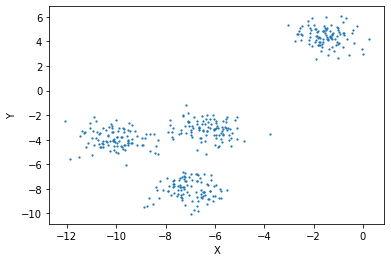

In [7]:
# Plot the data. Should be pretty obvious by-eye that there are 4 distinct clusters.
plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0)#, c=clusterID)
plt.xlabel("X")
plt.ylabel("Y")

Text(0, 0.5, 'Y')

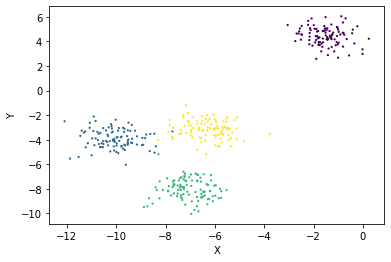

In [8]:
# Plot the data, colouring each point by cluster using the clusterID retuned by
#the blobs module.
plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0, c=clusterID)
plt.xlabel("X")
plt.ylabel("Y")

Just like with PCA last week, the KMeans algorithm is implemented as a *class* in SciKit Learn. To use it we initialise an *instance* of the class. Note that we need to specify the number of clusters to fit.

In [9]:
# Initialise a Kmean object to do the analysis
#help for skl_cl.KMeans by running: skl_cl.KMeans?
myKM = skl_cl.KMeans(n_clusters=4)

# Run the fitting method on the 2-D data array.
myKM.fit(data)

KMeans(n_clusters=4)

The results are stored inside the ```myKM``` object and can be accessed via the attributes ```myKM.cluster_centers_``` and ```myKM.labels_``` (note the underscore).

In [10]:
# Show the coordinates of the cluster centres
myKM.cluster_centers_

array([[ -1.5050135 ,   4.43000857],
       [ -7.04769631,  -8.0624247 ],
       [-10.04279417,  -3.93439456],
       [ -6.30504882,  -3.14716108]])

We can use the ```myKM.predict()``` method to predict which cluster each point belongs to. This method returns an array like the ground-truth ```clusterID``` array we created above.

In [11]:
# Use kmeans to predict cluster membership 
clusters = myKM.predict(data)
clusters

array([3, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 0, 3, 2, 0, 2, 2, 1, 1, 0,
       2, 0, 3, 2, 1, 1, 1, 0, 1, 3, 2, 2, 0, 1, 0, 2, 2, 0, 3, 3, 3, 3,
       0, 3, 2, 1, 2, 2, 1, 0, 2, 0, 2, 0, 3, 1, 1, 2, 2, 0, 1, 2, 1, 3,
       2, 0, 2, 1, 3, 1, 1, 2, 2, 3, 1, 3, 1, 1, 0, 0, 1, 0, 1, 3, 0, 3,
       1, 0, 2, 3, 3, 1, 1, 1, 1, 3, 0, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 1, 0, 0, 0, 3, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 1, 2, 3, 1,
       0, 2, 3, 1, 2, 2, 3, 0, 3, 1, 3, 2, 3, 3, 2, 1, 2, 2, 2, 3, 0, 0,
       3, 3, 0, 0, 2, 3, 0, 1, 1, 3, 3, 2, 1, 0, 3, 1, 1, 1, 0, 3, 2, 3,
       2, 1, 1, 3, 2, 2, 1, 3, 0, 2, 2, 0, 3, 0, 0, 2, 2, 2, 1, 3, 0, 1,
       0, 1, 1, 3, 1, 1, 1, 0, 0, 2, 3, 2, 3, 0, 3, 3, 3, 2, 2, 0, 3, 2,
       3, 0, 2, 3, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 0, 1, 3, 0, 1, 0, 0, 2,
       3, 0, 2, 1, 0, 2, 3, 2, 0, 1, 1, 0, 2, 0, 3, 3, 0, 1, 0, 0, 3, 3,
       1, 1, 3, 0, 2, 2, 3, 0, 0, 3, 3, 3, 1, 0, 0, 3, 3, 1, 2, 0, 0, 1,
       1, 1, 2, 1, 1, 0, 3, 0, 1, 0, 1, 2, 2, 3, 1,

Now plot the data coloured by predicted cluster membership. Compare to the ground-truth plot we made above.

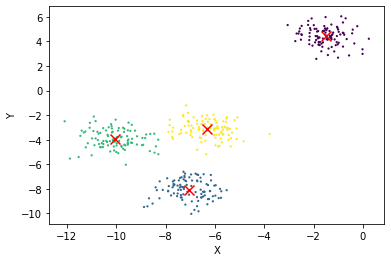

In [12]:
# Plot the data, colouring it by cluster
plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0, c=clusters)
plt.xlabel("X")
plt.ylabel("Y")

# Plot the centres of each cluster as an X
for cluster_x, cluster_y in myKM.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='x')

We specified a the width of each Gaussian clusters distribution to be small, so that all clusters nicely separated. In this case, K-Means does a good job of separating out the membership.

### Advantages of K-Means
 * Simple algorithm, fast to compute. A good choice as the first thing to try when attempting to cluster data.
 * Suitable for large datasets due to its low memory and computing requirements.

### Limitations of K-Means

 * Requires number of clusters to be known in advance
 * Struggles when clusters have irregular shapes, or when smaller clusters are embedded within larger clusters
 * Will always produce an answer finding the required number of clusters even if the data isn't clustered (or clustered in that many clusters).
 * Requires linear cluster boundaries

## Exercise: more datapoints and overlapping clusters 

Adjust the program above to increase the standard deviation of the blobs (the cluster_std parameter to make_blobs) and increase the number of samples (n_samples) to 4000. You should start to see the clusters overlapping. Do the clusters that are identified make sense? Is there any strange behaviour from this?

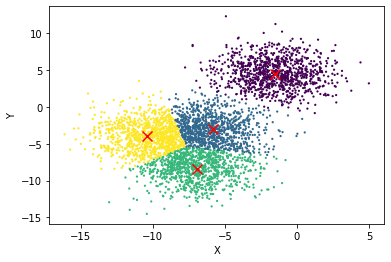

In [14]:
# SOLUTION:

#Centres should look pretty close to what we expect, but points are divided by 
#essentially straight lines. This is because of the way the algorithm works to assign points to their
#closest centroid and minimise the distances between the "nodes" or defined centres. So, overlapping
#datasets often have more ambiguous datasets. 

#Show the original IDs from the blobs output

#show how decreasing and increasing the number of clusters impacts the allocations. Point is that need to know
#the number of clusters beforehand -- KMeans will continue to split up the data into different clusterings around the
#numer of specified centroids.

# Create the data
data, clusterID = blobs(n_samples=4000,     
                        cluster_std=2,
                        centers=4, 
                        random_state=1)

# Run the k-means algorithm 
myKM = skl_cl.KMeans(n_clusters=4)
myKM.fit(data)
clusters = myKM.predict(data)

# Plot the data, colouring it by cluster
plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0, c=clusters)#c=clusterID)
plt.xlabel("X")
plt.ylabel("Y")

# Plot the centres of each cluster as an X
for cluster_x, cluster_y in myKM.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='x')

### Exercise: How many clusters should we look for?

As K-Means requires us to specify the number of clusters to expect a common strategy to get around this is to vary the number of clusters we are looking for. 

*Modify the program to loop through searching for between 2 and 10 clusters in a dataset of 8000 samples. Which (if any) of the results look more sensible? What criteria might you use to select the best one?*

Elapsed time = 0.038 s


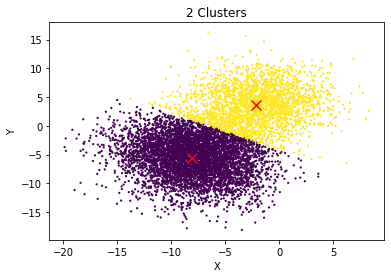

Elapsed time = 0.058 s


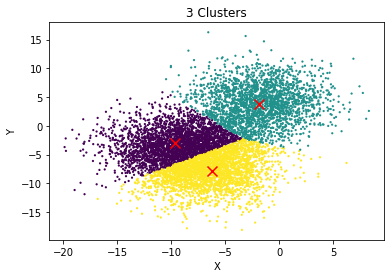

Elapsed time = 0.074 s


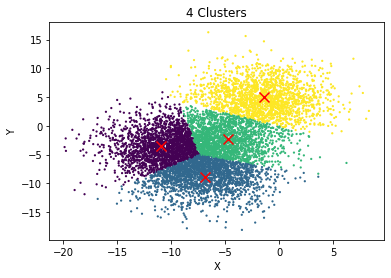

Elapsed time = 0.085 s


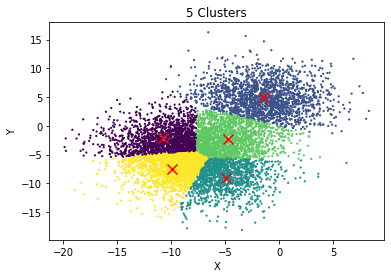

Elapsed time = 0.148 s


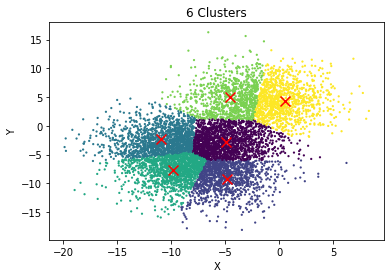

Elapsed time = 0.130 s


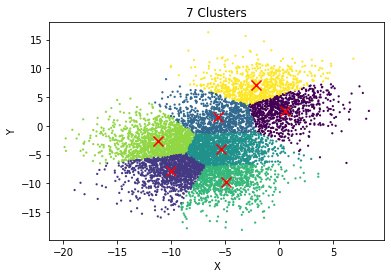

Elapsed time = 0.163 s


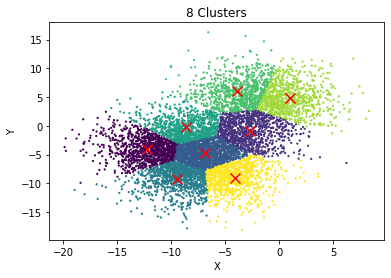

Elapsed time = 0.169 s


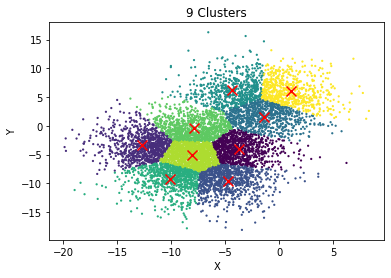

Elapsed time = 0.156 s


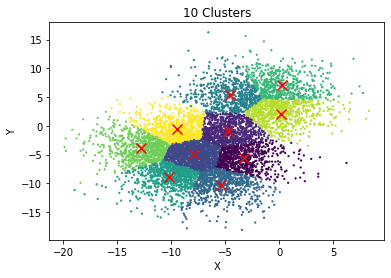

In [15]:
#let's put in a timer too to see how long it takes to run each fit with increasing the number of clusters.
# SOLUTION

# Make the data
data, clusterID = blobs(n_samples=8000,
                        cluster_std=3,
                        centers=4,
                        random_state=1)

# Loop through the number of cluster to be found
for nClusters in range(2,11):
    
    startTime = time.time()#sets the Startime variable to the current time in seconds

    # Run K-Means
    myKM = skl_cl.KMeans(n_clusters=nClusters)
    myKM.fit(data)
    clusters = myKM.predict(data)
    endTime = time.time() #end time in seconds
    print("Elapsed time = {:.3f} s".format(endTime - startTime))
    
    # Plot the data, colouring it by cluster
    plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0, c=clusters)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(str(nClusters) + " Clusters")

    # Plot the centres of each cluster as an X
    for cluster_x, cluster_y in myKM.cluster_centers_:
        plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='x')
    
    # Need this to show plots at each iteration
    plt.show()

## Spectral Clustering

Spectral clustering is a technique that attempts to overcome the linear boundary problem of k-means clustering. It works by treating clustering as a graph partitioning problem, it's looking for nodes in a graph with a small distance between them. 

To illustrate spectral clustering we will make a dataset of concentric circles:

Text(0, 0.5, 'Y')

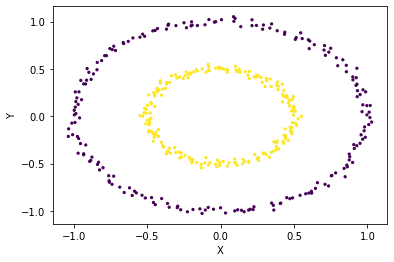

In [18]:
# Create the circles
data, clusterID = datasets.make_circles(n_samples=400,
                                           noise=.025, factor=.5,
                                           random_state=0)

# Plot the data coloured by cluster
plt.scatter(data[:, 0], data[:, 1], s=5, c=clusterID)
plt.xlabel("X")
plt.ylabel("Y")

Try standard K-Means to see how it performs.

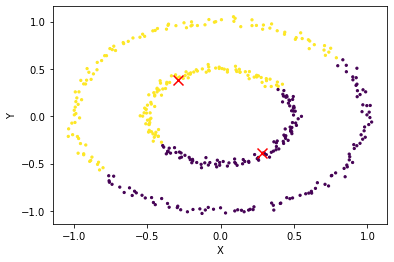

In [19]:
# Initialise K-Means and fit
myKM = skl_cl.KMeans(n_clusters=2)
myKM.fit(data)
clusters = myKM.predict(data)

# Plot the data coloured by cluster
plt.scatter(data[:, 0], data[:, 1], s=5, c=clusters)
plt.xlabel("X")
plt.ylabel("Y")

# Plot the centres of each cluster as an X
for cluster_x, cluster_y in myKM.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='x')

Now try Spectral Clustering.

/Users/mq20150564/software/anaconda2/envs/python37/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Text(0, 0.5, 'Y')

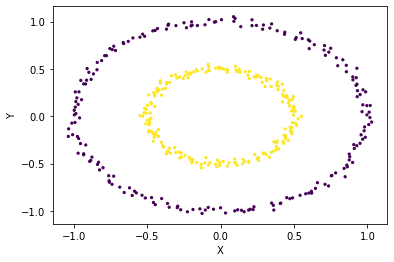

In [20]:
# Now try spectral clustering
mySC = skl_cl.SpectralClustering(n_clusters=2,
                                 affinity='nearest_neighbors',#this tells the algorithm how to define the 
                                                              #similarity between points. This finds the distance 
                                                             #between the 10 nearest neighbours to a point
                                 assign_labels='kmeans')#now use the kmeans clustering on the transformed dataspace
                                                        #to find clusters there.

# We can do the fitting and prediction in one step
clusters = mySC.fit_predict(data)

# Plot the data coloured by cluster
plt.scatter(data[:, 0], data[:, 1], s=5, c=clusters)
plt.xlabel("X")
plt.ylabel("Y")

In [21]:
skl_cl.SpectralClustering?

In [ ]:
datasets.make_circles?

Next time we will look at Gaussian Mixture modelling, which is similar to KMeans, but allows for embedded clusters,
clusters with shapes that are not spherical, amonst other things.